## Linear Regression model iwht sample PPG glucose dataset
This linear regression is solely for testing and using a generated dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df = pd.read_csv("../data-collection/data/raw/Sample_PPG___Glucose_Data.csv")
display(df.head())

,PPG_value,Blood_Glucose_Level,Age,Gender,Weight_lbs,Height_cm
0,2.113867,74,62,Female,161.963011,160.302693
1,2.473495,142,36,Male,233.879806,198.559018
2,1.300439,167,29,Female,178.215246,169.451823
3,1.200748,192,55,Female,221.368596,159.198901
4,1.463905,173,25,Female,194.009060,155.456815


In [5]:
# Select features (PPG_value) and target variable (Blood_Glucose_Level)
X = df[["PPG_value"]]  # Feature
y = df["Blood_Glucose_Level"]  # Target

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Display the model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: 131.3735054423258
Coefficient: -0.7653613451695872


In [8]:
# Make predictions
y_pred = model.predict(X_test)

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

Mean Absolute Error (MAE): 30.87
Mean Squared Error (MSE): 1181.57
Root Mean Squared Error (RMSE): 34.37
R-squared (R2 Score): -0.16


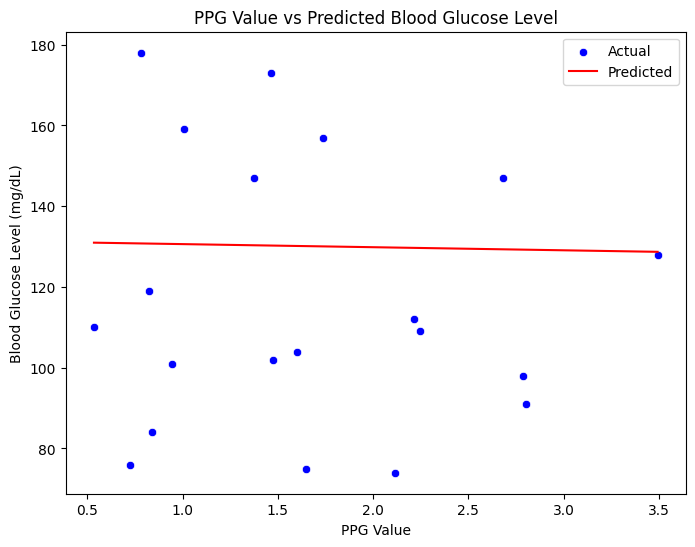

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test["PPG_value"], y=y_test, label="Actual", color='blue')
sns.lineplot(x=X_test["PPG_value"], y=y_pred, label="Predicted", color='red')
plt.title("PPG Value vs Predicted Blood Glucose Level")
plt.xlabel("PPG Value")
plt.ylabel("Blood Glucose Level (mg/dL)")
plt.legend()
plt.show()

In [10]:
def predict_glucose(ppg_value):
    estimated_glucose = model.predict([[ppg_value]])[0]
    return round(estimated_glucose, 2)

# Example usage
new_ppg_value = 2.5  # Example PPG value
predicted_glucose = predict_glucose(new_ppg_value)
print(f"Estimated Blood Glucose Level for PPG={new_ppg_value}: {predicted_glucose} mg/dL")

Estimated Blood Glucose Level for PPG=2.5: 129.46 mg/dL


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
